In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from scipy.stats import sem
from scipy.stats import stats
from scipy.stats import linregress

pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)


In [3]:
# Data munging
clean_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,4,10,16,17,18]])
clean_df.dtypes

# Change GDP per Capita data to float
clean_df['GDP per Capita'] = clean_df['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with null values
clean_df.count()   # Some null values in HDI, GDP
clean_df.dropna(how='any', inplace=True)

clean_df.head()


,Country,Region,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,0.50,-0.30,0.46
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,1.18,-1.03,1.27
2,Algeria,Africa,38.48,0.73,5430.57,2.12,0.59,-1.53,1.22
3,Angola,Africa,20.82,0.52,4665.91,0.93,2.55,1.61,0.54
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,0.94,-4.44,3.11


## Population v. Eco Footprint

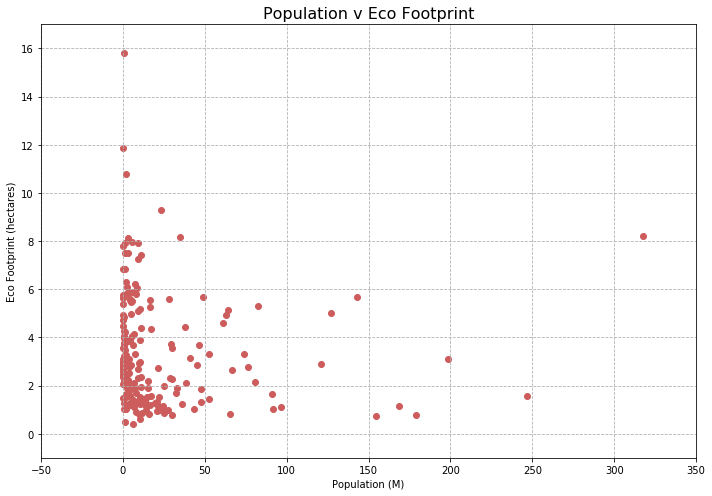


There does not seem to be a define relationship between population and eco footprint.
There is mostly just a cluster of low population countries randomly distributed along the 
eco footprint axis.

(Two countries with outlier populations (> 350M), China and India, were not included on 
this graph. Their eco footprints are 3.38 and 1.16, respectively.)



In [4]:
# Data lists
population = eco_csv['Population (millions)']
footprint = eco_csv['Total Ecological Footprint']

# Scatter plot
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(population, footprint, color='indianred')
plt.xlim(-50,350,50)
plt.ylim(-1,17)
plt.title('Population v Eco Footprint', fontsize=16)
plt.xlabel('Population (M)')
plt.ylabel('Eco Footprint (hectares)')
plt.grid(linestyle='--')

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '1_population_footprint.png')
plt.savefig(img_path)
plt.show()

# Observations
print('''
There does not seem to be a define relationship between population and eco footprint.
There is mostly just a cluster of low population countries randomly distributed along the 
eco footprint axis.

(Two countries with outlier populations (> 350M), China and India, were not included on 
this graph. Their eco footprints are 3.38 and 1.16, respectively.)
''')

## Development of Countries (HDI v GDP) Weighted by Footprint

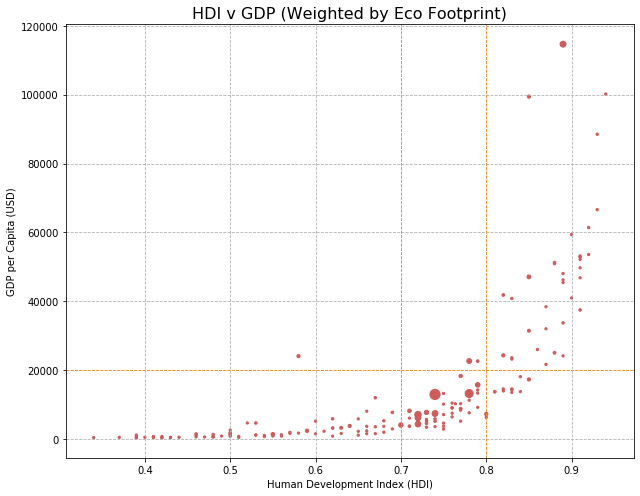


We decided to look at two other factors, Human Development Index (HDI) and Gross Domestic 
Product (GDP). Both of these, in part, define the overall development of a country. 

Developed countries are those with HDI >= 0.8. The range(s) for developing and 
lesser-developed countries are not fully agreed upon by economists but max GDP is
generally estimated around $20,000. 

As you can see, these ranges fit the our scatter plot, weighted by ecological footprints. 
The eco footprints become greater between HDI 0.7 and HDI 0.8. This indicates increased 
emissions activity especially as countries become closer to "developed" status.



In [5]:
# Calculate Footprint per Million Persons
footprint = clean_df['Total Ecological Footprint']/clean_df['Population (millions)']

# Data lists
hdi = clean_df['HDI'].tolist()
gdp = clean_df['GDP per Capita'].tolist()
footprint = [dot+5 for dot in footprint]

# Set up axes and labels
fig, ax = plt.subplots(figsize=(9,7))
plt.grid(linestyle='--')

gdp_min = plt.axhline(y=20000, linewidth=0.8, linestyle = '--', color='darkorange')
hdi_max = plt.axvline(x=0.80, linewidth=0.8, linestyle = '--', color='darkorange')
hdi_min = plt.axvline(x=0.70, linewidth=0.8, linestyle = '--', color='darkorange')

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('GDP per Capita (USD)')
plt.title('HDI v GDP (Weighted by Eco Footprint)', fontsize=16)

# Plot the chart
plt.scatter(hdi, gdp, s=footprint, color='indianred')

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '2_hdi_footprint.png')
plt.savefig(img_path)
plt.show()

# Observations
print('''
We decided to look at two other factors, Human Development Index (HDI) and Gross Domestic 
Product (GDP). Both of these, in part, define the overall development of a country. 

Developed countries are those with HDI >= 0.8. The range(s) for developing and 
lesser-developed countries are not fully agreed upon by economists but max GDP is
generally estimated around $20,000. 

As you can see, these ranges fit the our scatter plot, weighted by ecological footprints. 
The eco footprints become greater between HDI 0.7 and HDI 0.8. This indicates increased 
emissions activity especially as countries become closer to "developed" status.
''')

In [6]:
# Number of Developed Countries
developed = eco_csv.loc[(eco_csv['HDI']>=0.8),:]
developed_c = developed['Country'].count()
print(f'{developed_c} - Number of Developed Countries (HDI > 0.8)') 
# developed_c_list = developed['Country'].tolist()

# Number of Developing Countries
developing = eco_csv.loc[(eco_csv['HDI']>0.7) & (eco_csv['HDI']<0.8),:]
developing_c = developing['Country'].count()
print(f'{developing_c} - Number of Developing Countries (HDI between 0.7 and 0.8)')
# developing_c_list = developing['Country'].tolist()

45 - Number of Developed Countries (HDI > 0.8)
50 - Number of Developing Countries (HDI between 0.7 and 0.8)


## HDI v Earths Required

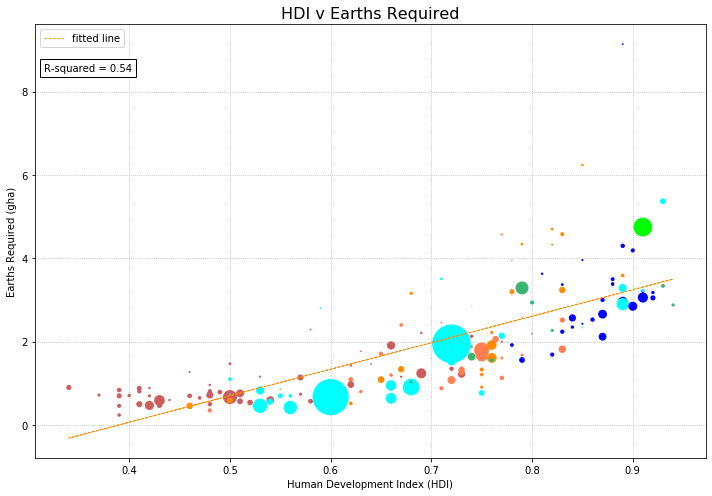

In [7]:
# defining variables
x = clean_df['HDI'].values.tolist()
y = clean_df['Earths Required'].values.tolist()
s = clean_df['Population (millions)'].values.tolist()

# define colors 
def color_attribute(region):
    colors = {
        "Africa": "indianred",
        "Asia-Pacific":"aqua",
        "European Union":"blue",
        "Latin America":'coral',
        "Middle East/Central Asia":'darkorange',
        "North America": "lime",
        "Northern/Eastern Europe": "mediumseagreen"}
    return colors.get(region, 'black')

color_region = []
countries = len(clean_df['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_df['Region'].tolist())[country]))

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x, y, s, c = color_region, zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linestyle = '--', linewidth=0.8, color='darkorange')
plt.legend()
plt.grid(linestyle='dotted', zorder=0)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.title("HDI v Earths Required", fontsize=16)
plt.text(0.315, 8.5, "R-squared = 0.54", bbox=dict(facecolor='white'))

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '3_hdi_earths_scatter.png')
plt.savefig(img_path)
plt.show()


In [8]:
# Number of Countries with Earths Required > 1.0
earths = eco_csv.loc[(eco_csv['Earths Required']>1.0),:]
all_earths = earths['Country'].count()

print(f'{all_earths} of all 188 countries have Earths Required > 1.0')

129 of all 188 countries have Earths Required > 1.0


## HDI Groups v Earths Required

In [9]:
# Create new HDI group dataframe
hdi_df = pd.DataFrame(clean_df)

# Create bins by HDI group
hdi_bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hdi_groups = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

hdi_df["HDI Groups"] = pd.cut(hdi_df["HDI"], hdi_bins, labels=hdi_groups)

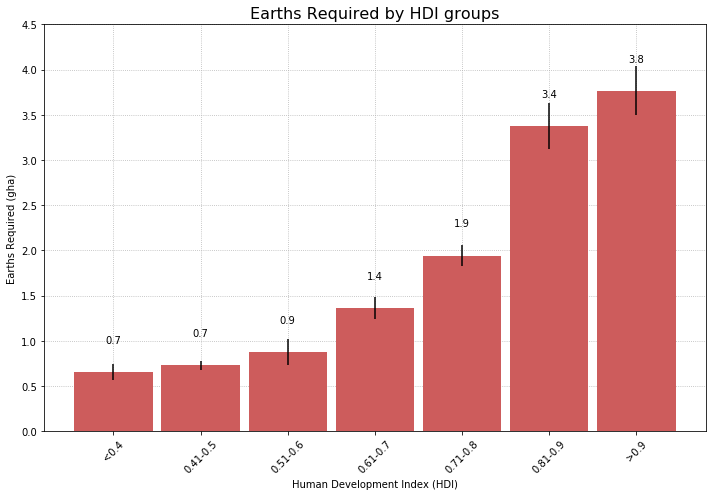

In [10]:
# calculating mean
hdi_earth_reqd = hdi_df.groupby("HDI Groups").mean()['Earths Required']
hdi_earth_reqd = pd.DataFrame(hdi_earth_reqd)

# calculating standard error
hdi_earth_sem = hdi_df.groupby("HDI Groups").sem()['Earths Required']
hdi_earth_sem = pd.DataFrame(hdi_earth_sem)

# data lists
earths_reqd = hdi_earth_reqd['Earths Required'].tolist()
sem = hdi_earth_sem['Earths Required'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks(x_axis)
ax.set_xticklabels(hdi_groups, rotation = 45)
plt.ylim(0, 4.5)
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.title ('Earths Required by HDI groups', fontsize=16)

rects1 = ax.bar(x_axis, earths_reqd, width = 0.9, color = 'indianred', yerr = sem, zorder=2)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.3, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '4a_hdi_earths.png')
plt.savefig(img_path)
plt.show()


## HDI Groups v Bio Reserve / Deficit

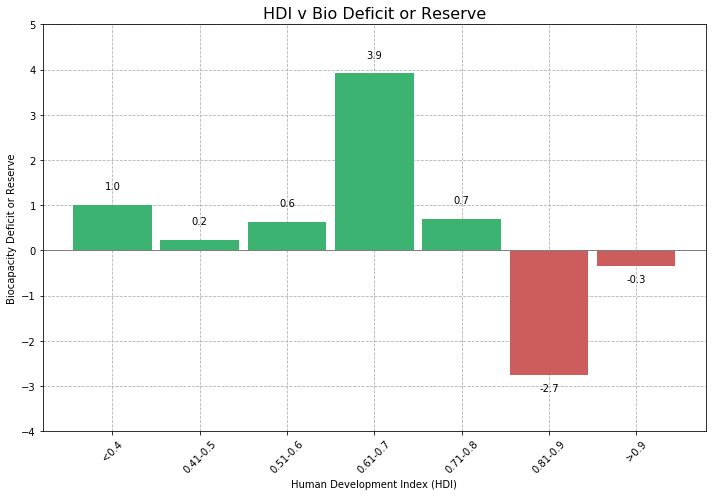

In [11]:
# calculating Biocapacity Deficit or Reserve mean
hdi_deficit= hdi_df.groupby("HDI Groups").mean()['Biocapacity Deficit or Reserve']
hdi_deficit = pd.DataFrame(hdi_deficit)

# data lists
deficit_reserve = hdi_deficit['Biocapacity Deficit or Reserve'].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks (x_axis)
ax.set_xticklabels (hdi_groups, rotation = 45)
plt.axhline(linewidth=1.0, color='grey')
plt.ylim(-4, 5)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Biocapacity Deficit or Reserve')
plt.title('HDI v Bio Deficit or Reserve', fontsize=16)
plt.grid(linestyle= '--', zorder=0)

# selecting colors of bars
bar_color = []
for num in deficit_reserve:
    if num <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

# bar chart
rects2 = ax.bar(x_axis, deficit_reserve, width = 0.9, color =bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.3
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects2)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '4b_hdi_reserve.png')
plt.savefig(img_path)
plt.show()


## GDP v Earths Required

In [12]:
# Create new GDP group dataframe
gdp_df = pd.DataFrame(clean_df)

# Create GDP bins
gdp_bins =[-1, 1000, 5000, 15000, 40000, 60000, 100000]
gdp_labels = ["< $1000", "< $5000", "< $15000", "< $40000", "< $60000", "< $100000"]

gdp_df["GDP Categories"] = pd.cut(gdp_df["GDP per Capita"], gdp_bins, labels=gdp_labels)

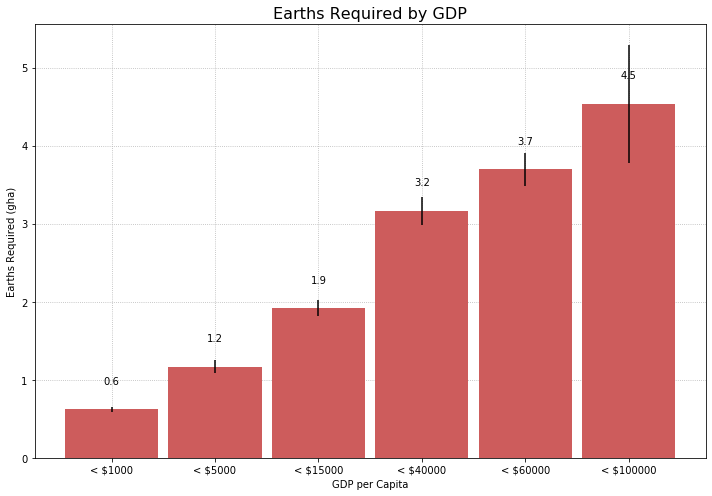

In [13]:
# calculating mean
gdp_earth_reqd = gdp_df.groupby("GDP Categories").mean()['Earths Required']
gdp_earth_reqd = pd.DataFrame(gdp_earth_reqd)

# calculating standard error
gdp_earth_sem = gdp_df.groupby("GDP Categories").sem()['Earths Required']
gdp_earth_sem = pd.DataFrame(gdp_earth_sem)

# data lists
gdp_earths_reqd = gdp_earth_reqd['Earths Required'].tolist()
gdp_sem = gdp_earth_sem['Earths Required'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(gdp_labels))
ax.set_xticks(x_axis)
ax.set_xticklabels(gdp_labels)
# plt.ylim(0, 4.5)
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('GDP per Capita')
plt.ylabel('Earths Required (gha)')
plt.title ('Earths Required by GDP', fontsize=16)

rects1 = ax.bar(x_axis, gdp_earths_reqd, width = 0.9, color = 'indianred', yerr = gdp_sem, zorder=2)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.3, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '5a_gdp_earths.png')
plt.savefig(img_path)
plt.show()


## GDP v Bio Reserve / Deficit

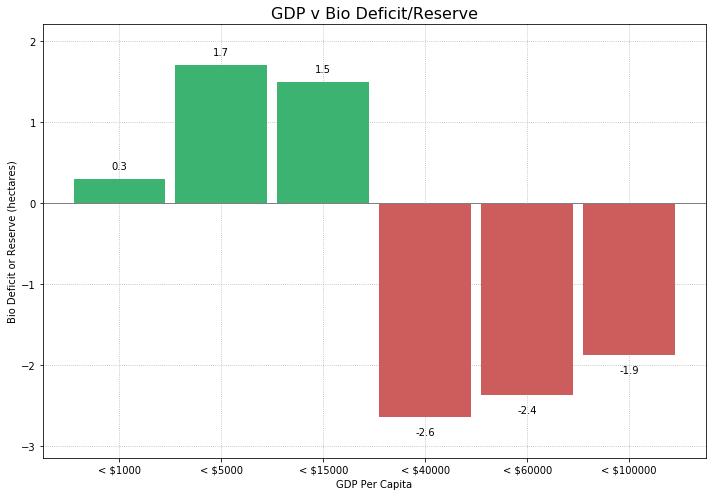

In [14]:
# calculating Biocapacity Deficit or Reserve mean
gdp_deficit = clean_df.groupby("GDP Categories").mean()

# data list
y_values = gdp_deficit["Biocapacity Deficit or Reserve"].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels (gdp_labels)
plt.xlim(-0.75, len(x_ticks)-0.25)
plt.ylim(min(y_values)-.5, max(y_values)+.5)
plt.axhline(linewidth=1.0, color='grey')
plt.grid(linestyle='dotted', zorder=0)

plt.title("GDP v Bio Deficit/Reserve", fontsize=16)
plt.xlabel("GDP Per Capita")
plt.ylabel("Bio Deficit or Reserve (hectares)")

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

rects3 = ax.bar(x_ticks, y_values, width=0.9, color=bar_color, zorder=2)


# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.1
        else:
            label = height - 0.25
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects3)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '5b_gdp_reserve.png')
plt.savefig(img_path)
plt.show()

## Countries Ranked by Eco Footprint

In [15]:
# Countries ranked by Eco Footprint
eco_sort = eco_csv.sort_values('Total Ecological Footprint')
eco_sort.reset_index(inplace=True, drop=True)
eco_sort

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Eritrea,Africa,6.130,0.390000,$439.73,0.10,0.18,0.06,0.03,0.01,...,0.07,0.18,0.09,0.93,0.02,1.30,0.88,0.24,0.320000,5
1,Timor-Leste,Asia-Pacific,1.110,0.600000,"$5,167.86",0.25,0.07,0.04,0.06,0.02,...,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28,0.270000,3B
2,Haiti,Latin America,10.170,0.480000,$749.13,0.27,0.04,0.10,0.15,0.01,...,0.18,0.03,0.01,0.01,0.03,0.27,-0.34,0.35,2.280000,6
3,Bangladesh,Asia-Pacific,154.700,0.560000,$857.50,0.29,0.00,0.08,0.26,0.02,...,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42,1.920000,6
4,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
5,Pakistan,Asia-Pacific,179.160,0.530000,"$1,218.60",0.27,0.01,0.08,0.38,0.02,...,0.26,0.00,0.01,0.04,0.03,0.35,-0.44,0.46,2.280000,6
6,Burundi,Africa,9.850,0.390000,$276.69,0.21,0.07,0.45,0.04,0.00,...,0.20,0.07,0.01,0.01,0.03,0.32,-0.48,0.46,2.480000,4
7,Malawi,Africa,15.910,0.430000,$493.84,0.43,0.05,0.20,0.07,0.01,...,0.45,0.07,0.02,0.06,0.05,0.66,-0.15,0.47,1.220000,5
8,"Congo, Democratic Republic of",Africa,65.700,0.420000,$338.63,0.15,0.01,0.51,0.07,0.01,...,0.13,0.32,2.52,0.05,0.05,3.07,2.25,0.47,0.270000,6
9,Rwanda,Africa,11.460,0.480000,$628.08,0.43,0.05,0.25,0.07,0.01,...,0.42,0.05,0.01,0.01,0.05,0.54,-0.32,0.50,1.600000,5


In [16]:
index_us = eco_sort.loc[eco_sort["Country"] == "United States of America"].index[0]
index_us += 1
index_us

print(f'The U.S. ranks {index_us} out of 188 countries in size of Eco Footprint.')

The U.S. ranks 184 out of 188 countries in size of Eco Footprint.


## HDI v Footprint (Stacked Bar Composition)

In [27]:
# Create new dataframe with parts of Eco Footprint
composition_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,5,6,7,8,9,10]])
composition_df.dropna(how='any', inplace=True)
composition_df["HDI Groups"] = pd.cut(composition_df["HDI"], hdi_bins, labels=hdi_groups)


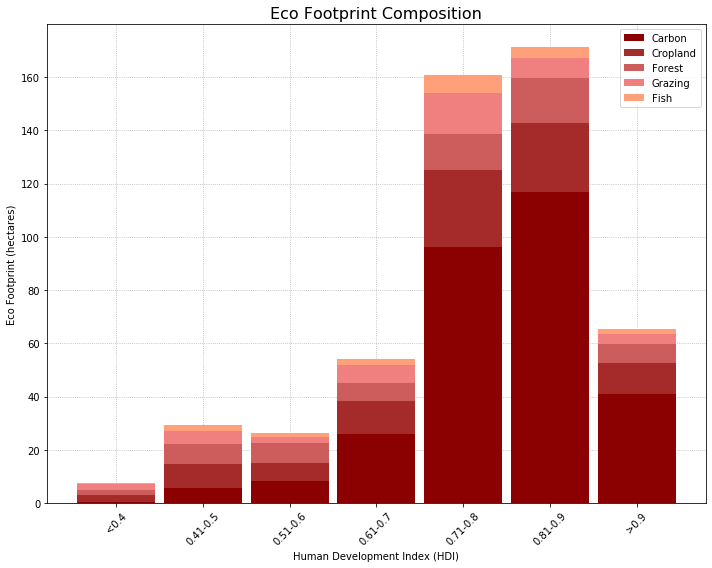

In [29]:
# Data lists
dev_footprint = composition_df.groupby('HDI Groups').sum()

carbon_foot = dev_footprint['Carbon Footprint']
crop_foot = dev_footprint['Cropland Footprint']
forest_foot = dev_footprint['Forest Footprint']
grazing_foot = dev_footprint['Grazing Footprint']
fish_foot = dev_footprint['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(hdi_groups))
ax.set_xticks(x_ticks)
ax.set_xticklabels(hdi_groups, rotation=45)
plt.grid(linestyle='dotted', zorder=0)
plt.title('Eco Footprint Composition', fontsize=16)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Eco Footprint (hectares)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks, carbon_foot, width=0.9, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks, crop_foot, width=0.9, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks, forest_foot, width=0.9, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks, grazing_foot, width=0.9, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks, fish_foot, width=0.9, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/7_hdi_footprint.png')
plt.show()

# Hypothesis Testing

### Hypothesis:
If developed countries create a negative impact on biocapacity reserve,
Then when HDI is 0.7 or higher, the footprint and/or bioreserve would decrease. (GDP?)

### Null:
If level of development in a country has no effect on biocapacity reserve,
Then the footprint and/or bioreserve would be random across countries.

In [ ]:
HDI_1 = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5'), :] ['Total Ecological Footprint']
HDI_2 = clean_df.loc[(clean_df['HDI Groups']=='0.51-0.6'), :] ['Total Ecological Footprint']
HDI_3 = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7'), :] ['Total Ecological Footprint']
HDI_4 = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8'), :] ['Total Ecological Footprint']
HDI_5 = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9'), :] ['Total Ecological Footprint']
HDI_6 = clean_df.loc[(clean_df['HDI Groups']=='>0.9'), : ] ['Total Ecological Footprint']

In [ ]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

## There was significant difference in the Total Eco Footprint among HDI groups with p-value 6.89e-28

In [ ]:
HDI_1 = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5'), :] ['Biocapacity Deficit or Reserve']
HDI_2 = clean_df.loc[(clean_df['HDI Groups'] =='0.51-0.6'), :] ['Biocapacity Deficit or Reserve']
HDI_3 = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7'), :] ['Biocapacity Deficit or Reserve']
HDI_4 = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8'), :] ['Biocapacity Deficit or Reserve']
HDI_5 = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9'), :] ['Biocapacity Deficit or Reserve']
HDI_6 = clean_df.loc[(clean_df['HDI Groups'] =='>0.9'), : ] ['Biocapacity Deficit or Reserve']

In [ ]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

## Oneway ANOVA comparison shows that there is no significant difference in the Biocapacity Deficit/Reserve among HDI-groups with p-value 0.204